### Procesamiento de Lenguage Natural
#### Taller #7: Clasificación y Agrupación
#### Rubio de Jesus Vasquez Bustamante

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
# Cargar datos
path = 'C:/Personal/SemestreII/NLP/Talleres/Taller7/reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


## Parte 1: Clasificación
### Dividir el conjunto de datos en entrenamiento y prueba

In [3]:
train, test = train_test_split(data, test_size=0.2) #, random_state=42)

print(f"El cojunto de datos de entrenamiento tiene {train.shape[0]} registros")
print(f"El cojunto de datos de prueba tiene {test.shape[0]} registros")

El cojunto de datos de entrenamiento tiene 800 registros
El cojunto de datos de prueba tiene 200 registros


### Punto 2: Hacer pre-procesamiento del texto

In [4]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [5]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

### Punto 3: Entrenar el modelo

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
nb = MultinomialNB()
logreg = LogisticRegression(class_weight="balanced")
svm = LinearSVC(class_weight='balanced')

In [7]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train);

### Punto 4: Métricas de evaluación

In [8]:
# Hacemos las predicciones para los datos de prueba (test)
#logreg.predict(X_test)

y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [9]:
# Exactitud
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")

Naive Bayes:            0.91
Regresión Logística:    0.86
SVM:                    0.84


In [10]:
# precisión
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='video_games'):>15.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='video_games'):>7.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='video_games'):>23.2f}")
    print()

precision_score
Naive Bayes:            0.89
Regresión Logística:    0.80
SVM:                    0.80

recall_score
Naive Bayes:            0.90
Regresión Logística:    0.91
SVM:                    0.87

f1_score
Naive Bayes:            0.90
Regresión Logística:    0.85
SVM:                    0.83



In [11]:
# Matriz de confusión
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()
print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()
print("SVM")
print(classification_report(y_test, y_pred_svm))

Naive Bayes
              precision    recall  f1-score   support

     jewelry       0.92      0.91      0.91       110
 video_games       0.89      0.90      0.90        90

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200


Regresión Logística
              precision    recall  f1-score   support

     jewelry       0.92      0.82      0.87       110
 video_games       0.80      0.91      0.85        90

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200


SVM
              precision    recall  f1-score   support

     jewelry       0.88      0.82      0.85       110
 video_games       0.80      0.87      0.83        90

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84   

### Parte 2: Agrupación
#### Punto 1: Hacer pre-procesamiento del texto

In [12]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())

#### Punto 2: Método del codo para determinar  𝐾

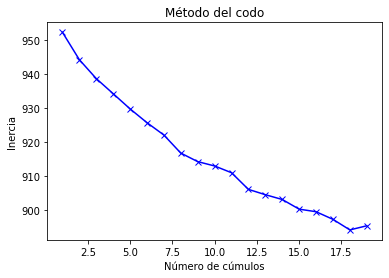

In [13]:
ks = []
kinertia = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks.append(k)
    kinertia.append(kmeans.inertia_)
    
plt.xlabel("Número de cúmulos"); 
plt.ylabel("Inercia");
plt.title('Método del codo')
plt.plot(ks,kinertia, 'bx-');

### Punto 3: Entrenar modelo con el  𝐾  escogido

In [35]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
k_pt = 10
model = KMeans(n_clusters=k_pt)
model.fit(tfidf_matrix)
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

data['cluster'] = model.labels_
clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

print(f"{color.BOLD}CLUSTERS:\n{color.END}")
centroids = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()

for i in range(k_pt):
    print(f"{color.BLUE}Cluster {i}:{color.END}")
    print(f"{color.CYAN}COUNT {color.END} {clust_cnt[i]} comments ({clust_cnt_pct[i]:.2%} of the data)")
    print(f"{color.CYAN}TERMS {color.END}", end=" ")
    for ind in order_centroids[i, :20]:
        print(f'{color.BOLD}{terms[ind]}{color.END}', end=" "),
    print(f"\n{color.CYAN}REPRESENTATIVE COMMENTS{color.END}")
    for comment in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]]['review_body'].values:
        print(f"* {comment}")
    print("\n")

CLUSTERS:

Cluster 0:
COUNT  70 comments (7.00% of the data)
TERMS  ha llegado me no el gustado que la todavía he de recibido producto es un lo para en aun juego 
REPRESENTATIVE COMMENTS
* No me ha llegado aun
* No ha llegado el collar . Las demás cosas que he comprado en Amazon han llegado, pero este producto no me ha llegado.
* No me ha gustado el juego.


Cluster 1:
COUNT  46 comments (4.60% of the data)
TERMS  en español las no amazon que juego como la nada expectativas el con pendientes castellano cumple así comprar de bonito 
REPRESENTATIVE COMMENTS
* En la realidad es más bonito que en las fotos.
* En juego como era de esperar te viene en ingles aunque si tu play 4 lo pones en español latino, te sale los subtitulos en español.
* El juego es muy bonito pero no está en español tal y como reseña


Cluster 2:
COUNT  112 comments (11.20% of the data)
TERMS  muy bonito es la el se queda de pero bien con no bonita que lo rápido en un para fina 
REPRESENTATIVE COMMENTS
* Es un colgante 

In [36]:
clusters = {0:'Entrega',
            1:'Precio',
            2:'Satisfecho',
            3:'CalidadProductoMala',
            4:'CalidadProductoBuen',
            5:'Tamano',
            6:'Empaque',
            7:'Descripcion',
            8:'Foto',
            9:'Contenido'}
data['cluster'] = data['cluster'].apply(lambda val: clusters[val])
data.sample(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
117,es_0133011,product_es_0425056,reviewer_es_0153932,2,Se quedan atascados y no salen bien por abajo.,Se atascan,es,jewelry,Descripcion
198,es_0401821,product_es_0582275,reviewer_es_0801328,3,"Pulsera muy mala, mejor jugar para niño",Maso menos bien,es,jewelry,Satisfecho


In [37]:
df_centroides = pd.DataFrame(model.cluster_centers_)
df_centroides['cluster'] = clusters.values()
df_centroides

,0,1,2,3,4,5,6,7,8,9,...,3820,3821,3822,3823,3824,3825,3826,3827,3828,cluster
0,-9.757820e-19,8.673617e-19,2.168404e-19,-1.084202e-19,1.084202e-19,3.404476e-03,-9.757820e-19,-1.897354e-19,-1.626303e-19,5.421011e-19,...,1.192622e-18,-1.084202e-19,5.421011e-20,2.168404e-19,-2.168404e-19,-6.505213e-19,-1.084202e-19,-4.336809e-19,6.505213e-19,Entrega
1,-2.168404e-19,8.673617e-19,2.710505e-19,-1.219727e-19,1.084202e-19,0.000000e+00,-6.505213e-19,-1.084202e-19,2.710505e-19,4.336809e-19,...,1.084202e-19,-1.219727e-19,5.421011e-20,6.770637e-03,-2.168404e-19,-1.084202e-19,1.084202e-19,8.673617e-19,6.505213e-19,Precio
2,7.589415e-19,5.117956e-03,-2.168404e-19,1.897354e-19,1.658011e-03,-1.951564e-18,-1.192622e-18,-2.439455e-19,-4.878910e-19,6.505213e-19,...,4.336809e-19,1.897354e-19,5.421011e-20,2.710505e-19,-2.168404e-19,-1.192622e-18,-6.505213e-19,-4.770490e-18,5.846196e-03,Satisfecho
3,-3.252607e-19,8.673617e-19,2.710505e-19,-1.355253e-19,1.084202e-19,-1.084202e-19,-6.505213e-19,-1.084202e-19,3.252607e-19,4.336809e-19,...,1.544893e-02,-1.355253e-19,5.421011e-20,2.168404e-19,-2.168404e-19,-1.084202e-19,1.084202e-19,8.673617e-19,6.505213e-19,CalidadProductoMala
4,-2.927346e-18,1.470058e-03,1.002147e-03,4.668800e-04,8.199310e-04,-2.710505e-18,4.884392e-04,-2.710505e-20,-7.589415e-19,-2.168404e-19,...,2.493665e-18,4.668800e-04,-5.421011e-19,2.710505e-19,1.680513e-18,3.178407e-03,4.878910e-19,1.797169e-03,-1.517883e-18,CalidadProductoBuen
5,2.168404e-19,6.505213e-19,1.084202e-19,-1.084202e-19,1.084202e-19,0.000000e+00,-4.336809e-19,-5.421011e-20,2.168404e-19,4.336809e-19,...,-1.084202e-19,-1.084202e-19,5.421011e-20,1.626303e-19,-1.626303e-19,3.252607e-19,1.084202e-19,8.673617e-19,6.505213e-19,Tamano
6,-7.589415e-19,8.673617e-19,3.794708e-19,-1.490778e-19,1.084202e-19,2.098855e-03,-7.589415e-19,2.287877e-03,5.421011e-20,5.044195e-03,...,7.589415e-19,-1.490778e-19,5.421011e-20,2.168404e-19,-2.168404e-19,-5.421011e-19,1.084202e-19,5.801513e-03,6.505213e-19,Empaque
7,6.141809e-03,-4.336809e-19,-1.626303e-19,1.626303e-19,-7.589415e-19,1.668272e-03,-1.084202e-18,-2.439455e-19,-4.336809e-19,6.505213e-19,...,5.421011e-19,1.626303e-19,5.421011e-20,2.710505e-19,-2.710505e-19,1.308283e-03,-5.963112e-19,1.389824e-03,2.615565e-03,Descripcion
8,8.114208e-04,1.502104e-03,1.029992e-18,4.201283e-19,-2.114194e-18,7.254371e-04,2.203387e-03,-2.981556e-19,1.438061e-03,1.014784e-03,...,1.734723e-18,4.201283e-19,5.957694e-04,2.710505e-19,1.233725e-03,4.228388e-18,1.096663e-03,4.412718e-03,1.464297e-03,Foto
9,2.168404e-19,8.673617e-19,1.626303e-19,-1.084202e-19,1.084202e-19,0.000000e+00,-4.336809e-19,-5.421011e-20,2.168404e-19,4.336809e-19,...,-1.084202e-19,-1.084202e-19,5.421011e-20,2.168404e-19,-2.168404e-19,2.168404e-19,1.084202e-19,8.673617e-19,6.505213e-19,Contenido


### Parte 3: Comparación

#### Punto 1: Hacer predicción para estas dos frases de los dos modelos
#### Punto 2: Preguntas

##### ¿A cuál modelo le fue mejor?
 Al modelo de regresion
 
 ¿Cuál modelo se demoró más en entrenar?
 El modelo K
 
 Según los resultados del  𝐾 -Means, ¿cuál es la estructura latente de los datos?
 

¿Alguna otra observación?